In [1]:
import os
import numpy as np
import tables
import matplotlib as mpl; mpl.use('TkAgg')
import matplotlib.pyplot as plt
import math
%matplotlib inline  



tau_type = '1p1n'
h5_filename = os.path.join(
    os.getenv('DATA_AREA'), 'tauid_ntuples', 'v12', 'test', 'output.selected.h5')

# h5file = File(h5_filename, mode='r')
# rec = h5file.get('rec_' + tau_type)
#images_new_3p1n.h5

h5file = tables.open_file(h5_filename)
records = getattr(h5file.root,  'tree_' + tau_type)

/Users/quentin/software/imaging_ve/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# records

In [3]:
index = 340
rec = records[index]



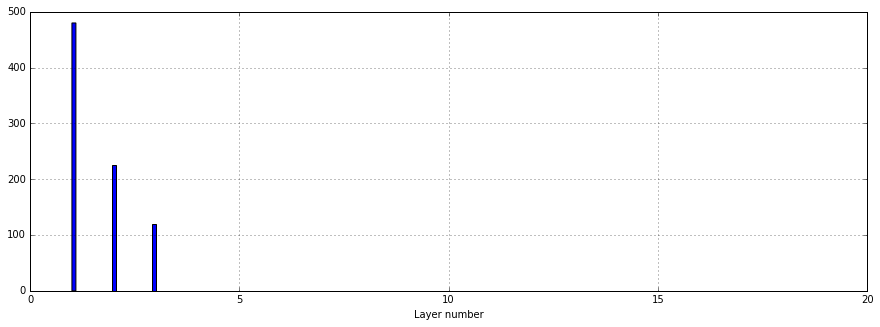

In [4]:
layers_ind = np.where(rec['off_cells_samp'] != -1)
layers = rec['off_cells_samp'].take(layers_ind[0])

plt.rcParams["figure.figsize"] = (15, 5)
_, _, _ = plt.hist(layers, 21)
plt.xlabel('Layer number')
plt.xlim(0, 20)
#plt.axis([i for i in range(20)])
plt.grid(True)

plt.show()
#print np.sort(layers)

In [8]:
def tau_image_clus(rec, layer):
    indices = np.where(rec['off_cells_samp'] == layer)
    ene_ = rec['off_cells_e_norm'].take(indices[0])
    eta_ = rec['off_cells_deta_digit'].take(indices[0])
    phi_ = rec['off_cells_dphi_digit'].take(indices[0])
    eta_r_ = rec['off_cells_deta'].take(indices[0])
    phi_r_ = rec['off_cells_dphi'].take(indices[0])
    image = [[0 for j in range(width)] for i in range(height)]
    #print indices
    #print eta_[0]
    #print phi_[0]
    for eta, phi, ene in zip(eta_, phi_, ene_):
        eta_ind = int(eta + math.floor(width / 2))
        phi_ind = int(phi + math.floor(height / 2))
        #print
        #print eta, eta_ind
        #print phi, phi_ind
        # print eta_ind, phi_ind, ene
        if eta_ind < width  and eta_ind > 0 and phi_ind < height and phi_ind > 0:
            image[phi_ind][eta_ind] = ene
    image = np.asarray(image)
    return eta_, phi_, eta_r_, phi_r_, ene_, image



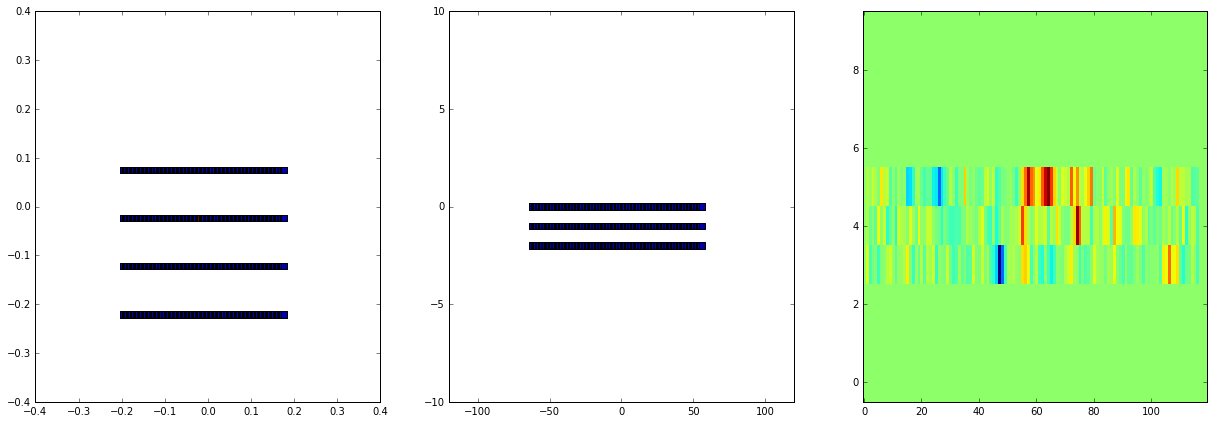

In [9]:
plt.rcParams["figure.figsize"] = (21, 7)

layer, width, height, w_r, h_r = 1, 120, 10, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)




f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width, width)
axarr[1].set_ylim(-height, height)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()



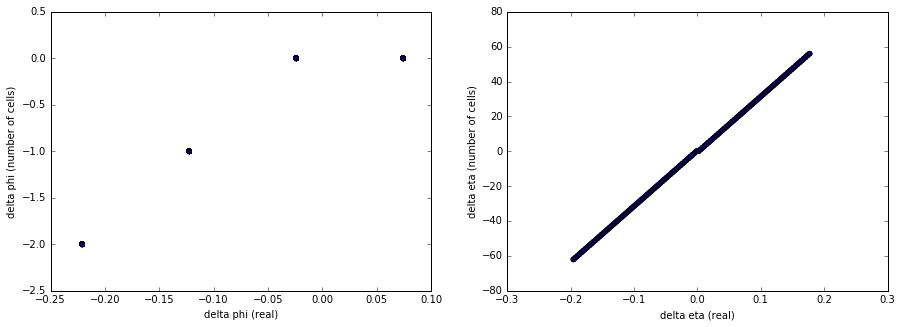

In [10]:
plt.rcParams["figure.figsize"] = (15, 5)
f, axarr = plt.subplots(1, 2)
axarr[0].scatter(phi_r_, phi_, c=ene_)
axarr[0].set_xlabel('delta phi (real)')
axarr[0].set_ylabel('delta phi (number of cells)')
axarr[1].scatter(eta_r_, eta_, c=ene_)
axarr[1].set_xlabel('delta eta (real)')
axarr[1].set_ylabel('delta eta (number of cells)')
plt.show()
plt.rcParams["figure.figsize"] = (21, 7)


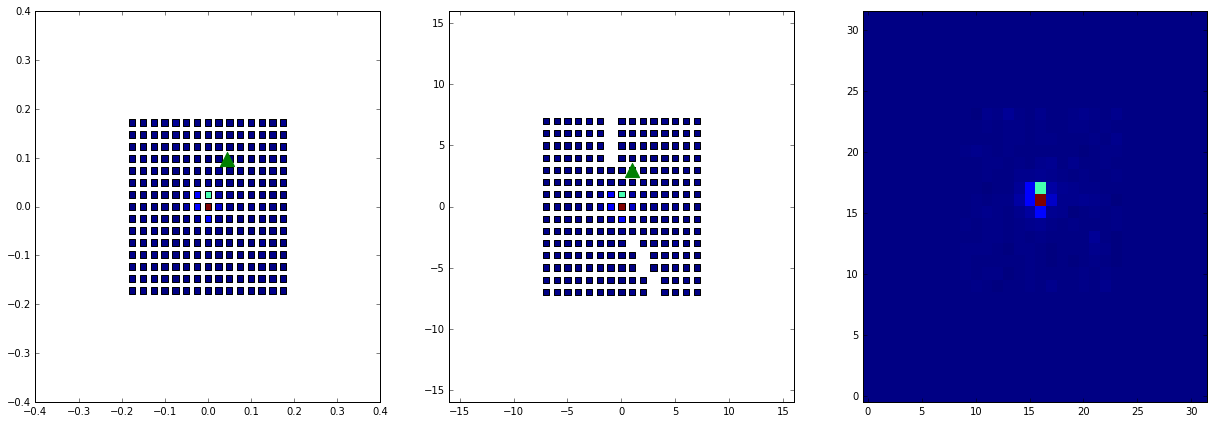

In [11]:
layer, width, height, w_r, h_r = 2, 32, 32, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

tracks_ind = np.where(rec['off_tracks_deta_digit'] != -1111)
tracks_eta_ = rec['off_tracks_deta_digit'].take(tracks_ind[0])
tracks_eta_r_ = rec['off_tracks_deta'].take(tracks_ind[0])
tracks_phi_ = rec['off_tracks_dphi_digit'].take(tracks_ind[0])
tracks_phi_r_ = rec['off_tracks_dphi'].take(tracks_ind[0])

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].scatter(tracks_eta_r_, tracks_phi_r_, marker='^', s=200, color='green')
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].scatter(tracks_eta_, tracks_phi_, marker='^', s=200, color='green')
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()

In [12]:
tracks_ind = np.where(rec['off_tracks_deta_digit'] != -1111)
tracks_eta = rec['off_tracks_deta_digit'].take(tracks_ind[0])
tracks_eta_r = rec['off_tracks_deta'].take(tracks_ind[0])
print tracks_ind
print tracks_eta
#plt.rcParams["figure.figsize"] = (15, 15)
#plt.scatter(eta_, phi_, c=ene_, marker='s', size='40')
#plt.show()
#plt.rcParams["figure.figsize"] = (21, 7)


(array([0]),)
[1]


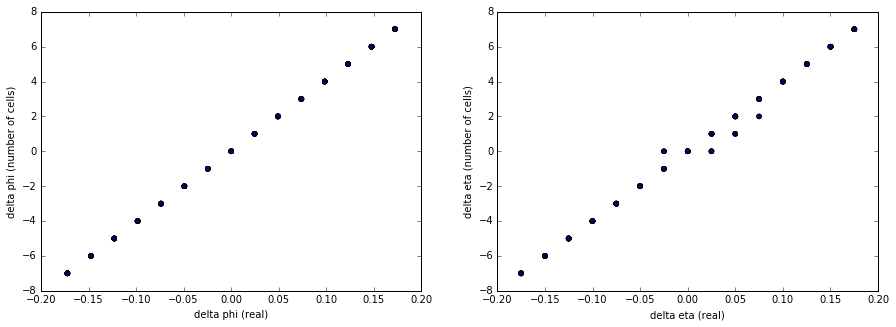

In [13]:
plt.rcParams["figure.figsize"] = (15, 5)
f, axarr = plt.subplots(1, 2)
axarr[0].scatter(phi_r_, phi_, c=ene_)
axarr[0].set_xlabel('delta phi (real)')
axarr[0].set_ylabel('delta phi (number of cells)')
axarr[1].scatter(eta_r_, eta_, c=ene_)
axarr[1].set_xlabel('delta eta (real)')
axarr[1].set_ylabel('delta eta (number of cells)')
plt.show()
plt.rcParams["figure.figsize"] = (21, 7)



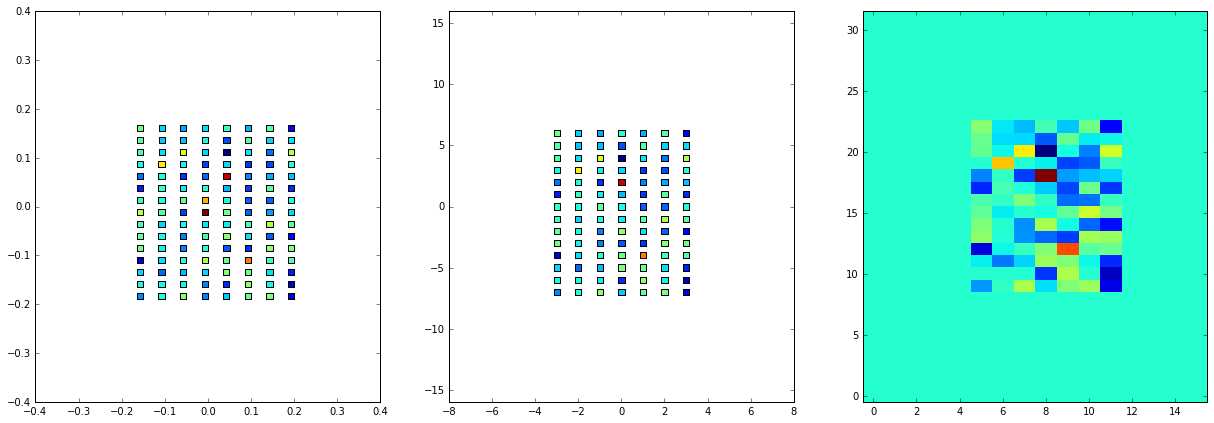

In [14]:
layer, width, height, w_r, h_r = 3, 16, 32, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()

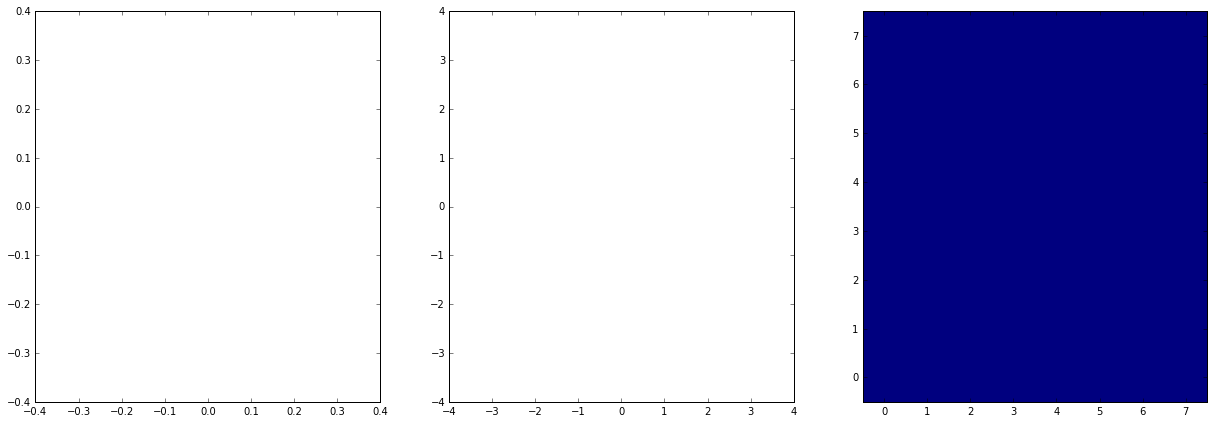

In [15]:
layer, width, height, w_r, h_r = 12, 8, 8, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2 , width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()


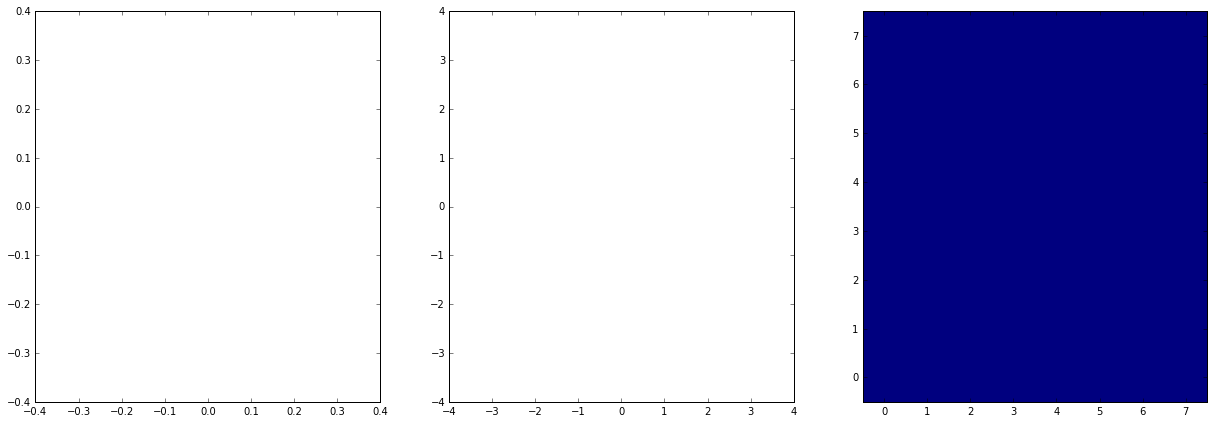

In [16]:
layer, width, height, w_r, h_r = 13, 8, 8, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()
